# Data Science 2 (BFVM19DATASC2) -- Exam Submodule 'Graph Theory' 
## 01/04/2021 12:30-14:00 H1.86
## Lecturer: Martijn Herber / m.herber@pl.hanze.nl / 050-3634071

Provide your answers in one or more code cells corresponding with each of the questions below. Where questions require a textual answer, type your text answer in a markdown text cell (double-click on "Type *Markdown* and LaTeX: $\alpha^2$"), or use a python code comment. You can receive partial credit on textual answers as well as code if you don't get the whole right answer. Be sure to explain your code through commenting, even if it doesn't work correctly.

**Materials:**

On your computer desktop you will find all data files and supplementary materials.
* Python Docs
* GTCN.pdf
* MCS.pdf
* notation.pdf
* lecture[567].html
* Practice_Exam_ANSWERS.html
* contiguous_usa.txt

You may use both the PDFs for "Graph Theory and Complex Networks" by Maarten van Steen and "Mathematics for Computer Science" by Leiserson et al, the Cheatsheet and the Lecture Notes, as well as the python documentation (both base libraries and numpy, networkx, matplotlib etc). All these files are provided on the desktop.

<div class="alert alert-warning">
<b>After finishing:</b>
<ol><li>
Rename your notebook with your name and student number, like `JohnDoe_123456`, using the menu option `File` > `Rename`.
</li><li>
Evaluate the notebook by means of the menu option `Kernel` > `Restart & Run All` and check that your notebook runs without errors.
</li><li>
Save the evaluated notebook using the menu option `File` > `Save and Checkpoint`.
</li><li>
Open a terminal, change to the desktop folder using `cd ~/Desktop`, and type `submit_your_work --help` to get help on submit script usage.
</li><li>
Submit your `*.ipynb` file.
</li></ol>
</div>

Keep track of time yourself; the total permitted time is 1.5 hrs (excluding special provisions, if applicable), so use it wisely. All questions have the possible number of points to be scored indicated. Your grade will be calculated as follows:

$$
\text{Grade} = 1 + 9 \cdot \frac {\text{Points Scored}} {\text{Maximum Score}}
$$

If you exceed the total allotted time for this exam, the score may be scaled down proportionately.

<div class="alert alert-info">Remember you can look up the documentation of any function or object by appending `?` (question mark) to it without calling it with `()` and evaluating the cell (e.g. `nx.Graph?`); this is the same documentation as you'd look up on the internet!</div>

In [ ]:
# YOUR NAME:   <ENTER YOUR NAME HERE>
# YOUR ST.NR.: <ENTER YOUR STUDENT NUMBER HERE>

In [1]:
# Global definitions you will need are here; RUN THIS CELL
# Define any extra global modules you want to add yourself here as well!
# As well as any extra helper functions you want to use in all exercises below.
import networkx as nx
import numpy as np
from timeit import timeit
from random import seed, sample
import matplotlib.pyplot as plt

import math

In [2]:
# timeit example
# You can only run simple evaluations of expressions or functions; if you want to write a more comprehensive test, use a function to wrap it!
# Don't forget to add the "globals=globals()" keyword argument to access your functions and imports
from timeit import timeit
import networkx as nx
print("Simple comprehension: ", timeit('[x*x for x in range(1000)]', globals=globals(), number=1))
G = nx.generators.directed.scale_free_graph(5000)
print("Hard pathfinding: ", timeit('nx.algorithms.shortest_paths.generic.shortest_path(G)', globals=globals(), number=1))

Simple comprehension:  0.0002698999999921625
Hard pathfinding:  2.5986137999999954


## Basics
### Question 1a <small> [6 pts] </small>
On the desktop is a dataset "contiguous-usa.txt". It models all the land borders in the contiguous 48 states of the USA. It consists of two columns: the first is the vertices representing all the 48 states, the second the states that are share borders with this state. Write a function that loads in this data into a simple, unweighted, non-directional NetworkX graph with 48 vertices and edges where the states share a border.

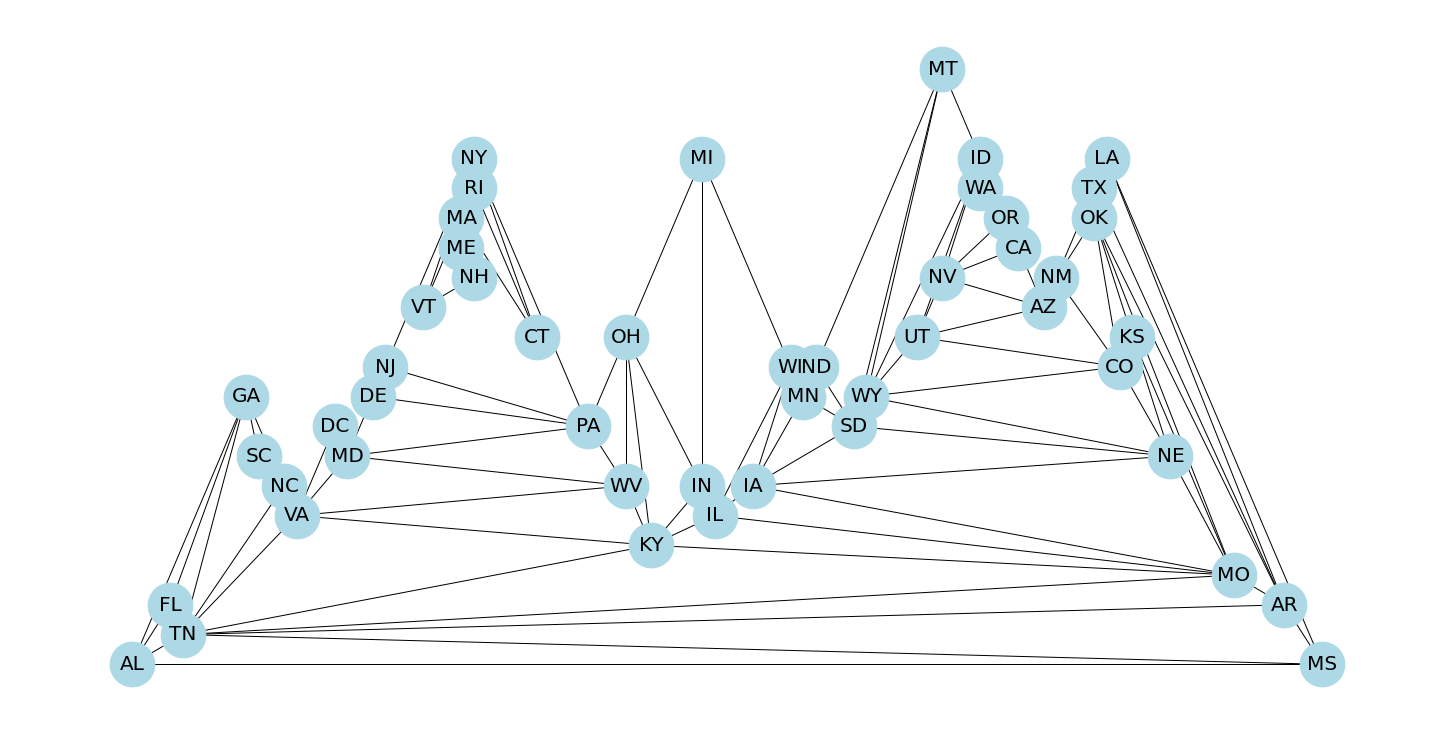

In [3]:
# Your code here!
G = nx.read_edgelist('contigous-usa.txt', create_using=nx.Graph)

pos = nx.planar_layout(G)

plt.figure(figsize=(20, 10))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=20)

plt.show()

### Question 1b <small> [4 pts] </small>

A corollary to Menger's Theorem (GTCNp40) is that a Graph G is _k-connected_ <em>if and only if</em> there exist at least _k_ independent pairwise paths between any two distinct vertices in the graph.

Write a python function "isKconnected(G,k)" that given a NetworkX graph G and a parameter _k_ checks whether the graph is K-connected and returns True if it is, and False if it isn't. You may use any auxiliary NetworkX functions you deem useful -- e.g. those in networkx.algorithms.connectivity.*

In [17]:
# Your code here!
def isKconnected(G, k):
    """A K-connected graph has V choose 2 edges."""
#     G_edges = G.size()
#     E = math.factorial(k) / math.factorial(k - 2) * math.factorial(2)
    is_connected = nx.algorithms.connectivity.is_k_edge_connected(G, k=k)
    
    return is_connected

### Question 1c <small> [4 pts] </small>
Using your own function "isKconnected(G,k)", and the dataset you loaded for 1.a. check what the maximum connectivity parameter _k_ of the U.S.A. is.

In [18]:
# Your code here!
for i in range(1, 10):
    is_k_connected = nx.algorithms.connectivity.is_k_edge_connected(G, k=i)
    if is_k_connected:
        print("The graph is K{}-connected.".format(i))
        
# Your code here!
for i in range(1, 10):
    is_k_connected = isKconnected(G, k=i)
    if is_k_connected:
        print("The graph is K{}-connected.".format(i))

The graph is K1-connected.
The graph is K1-connected.


## Graphic degree sequences

The book outlines a procedure to determine if any *ordered degree sequence* is actually *graphic*: that is, corresponds to a valid *simple graph*. I've implemented this recursive procedure as shown in the code cell below, called "is_seq_graphic(seq)". 

#### Question 2a <small>[6 pts]</small>

Using my function, and the timeit() function introduced above, determine its performance on a succession of degree sequences of larger graphs in the networkx.generators.random_graphs.gnp_random_graph(s, 0.5) class; vary s in the range [10,100] nodes with stepsize 10 (keep p at 0,5). 
NB: you will have to extract the ordered degree sequences from the generated graphs yourself; remember that the order needed to determine _graphicalness_ is from LARGE to SMALL (decreasing).

In [8]:
# Martijn's recursive is_degree_graphic definition:
def is_seq_graphic(seq):
    """
    Determine if a decreasing-ordered degree sequence "seq" is graphic or not.
    This is the wrapper function checking for the obvious necessary condition.
    NB: this is a wrapper for the real recursion.
    """

    if sum(seq) % 2 == 1:
        return False

    else:
        seq.sort(reverse=True)
        return is_seq_graphic_r(seq)


def is_seq_graphic_r(seq):
    """
    The *actual* recursive definition.
    """
    if not [item for item in seq if item != 0]:
        G = nx.Graph()
        G.add_nodes_from(range(seq.count(0)))
        return G
    else:
        head = seq[0]
        seq = [(lambda i,x : x - 1 if i < head else x)(i,x) for i, x in enumerate(seq[1:])]
        seq.sort(reverse=True)
        seq_length = len(seq)
        G = is_seq_graphic_r(seq)
        if G:
            G.add_node(seq_length)
            for edge in range(seq_length):
                for node in G.nodes():
                    if node != seq_length and not G.has_edge(edge, node):
                        G.add_edge(seq_length, node)
                        break
            return G
        
        else:
            return G

In [ ]:
# Your Code here!

#### Question 2b <small> 4 pts </small>
Plot the times taken against the graph size and characterize (estimate) the running time behavior $O(g(n))$ of the function. (For example does it appear $g(n) = log n$, $g(n) = cn$, $g(n) = cn^a$, $g(n) = x^n$ etc.?

In [7]:
# Your code here!

### Your explanation here!

## Disease dynamics (chapter 3, 6)

The "Karate Club Graph" generated by `networkx.generators.social.karate_club_graph` is a nice model to investigate disease dynamics. It is a group of people engaged in strenuous physical combat, after all!

### Question 3a <small>[2 pts]</small>

Explain why the measure of "characteristic path length" (GTCNp.141) may be a good indication of how fast a disease spreads in a community.

--------

*Characteristic path length* is the median of the average length of the shortest paths. It is a good indication of how fast a disease spreads in a community, because it is the exact center between the distances. It will not be biased by outliers. Especially useful for skewed networks.

------------

### Your explanation here!

### Question 3b <small>[6 pts]</small>

Unfortunately, the _characteristic_ path length is not defined in NetworkX (Its sibling "average path length" is; see `networkx.algorithms.shortest_paths.generic.average_shortest_path_length`). Define a function `characteristic_path_length(G)`, which given a graph G returns its characteristic path length, making use of the handy function `networkx.algorithms.shortest_paths.unweighted.single_source_shortest_path_length` (or any other function in the NetworkX library) for all the nodes in the graph.

In [39]:
# Your code here!
def characteristic_path_length(G):
    averages = {}
    for country, neighbour_list in nx.shortest_path_length(G):
        n = len(neighbour_list)
        averages[country] = sum(neighbour_list.values()) / (n-1)

    return np.median(np.array(list(averages.values())))

characteristic_path_length(G)

3.875

### Question 3c <small>[10 pts]</small>
The textbook GTCN asserted that the _characteristic path length_ (i.e. median of all shortest paths) is easier to estimate than the _average path length_. Let's investigate this. You've already had to calculate all shortest path lengths for question 3b. Take random samples (using the `sample` function imported from `random` above) from this set of shortest paths of increasing size 1...n where n is the total number of shortest paths. Calculate the median for each of the samples and plot them vs the sample size. Also plot a line representing the _average path length_.

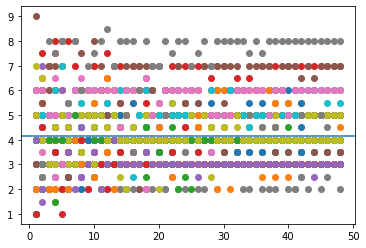

In [7]:
# Your code here!
nodes = G.nodes()

for node in nodes:
    shortest_paths = nx.single_source_shortest_path_length(G, source=node)
    sample_median = {}
    for i in range(1, len(shortest_paths)):
        sample_size = i
        samples = sample(sorted(shortest_paths), sample_size)
        paths = [v for k, v in shortest_paths.items() if k in samples]
        
        median = np.median(paths)
        
        sample_median[sample_size] = median
        
        
    sample_size = sample_median.keys()
    medians = sample_median.values()

    plt.plot(sample_size, medians, 'o')
    
average = nx.average_shortest_path_length(G)

plt.axhline(average)
    
plt.show()

#### Your answer here!

### Question 3e <small>[4 pts]</small>
Use `timeit` to see how long that estimation takes given _x_ shortest path calculations on the Karate Club Graph vs. the 'official' `average_shortest_path_length` for the graph. How much difference do you see?

In [ ]:
# Your code here!

#### Your answer here!

***

## End of this exam

<div class="alert alert-warning">See the instructions at the top of this document for how to submit your answers.</div>

*Success!*